## Ensamblado


In [ ]:

install.packages("caret")
install.packages("e1071")
install.packages("kernlab")
install.packages("dummies")
install.packages("reshape")
install.packages("randomForest")
library(caret)
library(reshape)
library(rpart)
library("e1071")
library(ggplot2)

options(warn=-1)


In [ ]:
source("cruzadas ensamblado binaria fuente.R")

In [2]:
load("data.Rda")
head(data)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


In [3]:
dput(names(data))

c("age", "yronset", "sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y", "outcome")


In [6]:
set.seed(40)

In [7]:
archivo<-data
vardep<-"outcome"
listconti<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", "smstat_nk", "yronset", "stroke_y", "stroke_nk")
listclass<-c("")
grupos<-10
sinicio<-1234
repe<-10

## Aplicación cruzadas para ensamblar

In [12]:

medias1<-cruzadalogistica(data=archivo,
                          vardep=vardep,listconti=listconti,
                          listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe)

medias1bis<-as.data.frame(medias1[1])
medias1bis$modelo<-"Logistica"
predi1<-as.data.frame(medias1[2])
predi1$logi<-predi1$Yes



In [11]:
medias2<-cruzadaavnnetbin(data=archivo,
                          vardep=vardep,listconti=listconti,
                          listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe,
                          size=c(5),decay=c(0.001),repeticiones=5,itera=500)

medias2bis<-as.data.frame(medias2[1])
medias2bis$modelo<-"avnnet"
predi2<-as.data.frame(medias2[2])
predi2$avnnet<-predi2$Yes


  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8762525 0.7439664 0.01192974 0.02510813


In [13]:
medias3<-cruzadarfbin(data=archivo,
                      vardep=vardep,listconti=listconti,
                      listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe,
                      mtry=9,ntree=3000,nodesize=10,replace=TRUE)

medias3bis<-as.data.frame(medias3[1])
medias3bis$modelo<-"bagging"
predi3<-as.data.frame(medias3[2])
predi3$bagging<-predi3$Yes

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8709749 0.7341376  0.0110444 0.02315059


In [15]:
medias301<-cruzadarfbin(data=archivo,
                      vardep=vardep,listconti=listconti,
                      listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe,
                      mtry=3,ntree=3000,nodesize=10,sampsize=150,replace=TRUE)

medias301bis<-as.data.frame(medias301[1])
medias301bis$modelo<-"rf"
predi301<-as.data.frame(medias301[2])
predi301$rf<-predi301$Yes

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8795197 0.7506035 0.01128486 0.02388147


In [16]:
medias4<-cruzadagbmbin(data=archivo,
                       vardep=vardep,listconti=listconti,
                       listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe,
                       n.minobsinnode=5,shrinkage=0.03,n.trees=500,interaction.depth=2)

medias4bis<-as.data.frame(medias4[1])
medias4bis$modelo<-"gbm"
predi4<-as.data.frame(medias4[2])
predi4$gbm<-predi4$Yes


  n.minobsinnode shrinkage n.trees interaction.depth Accuracy     Kappa
1              5      0.03     500                 2 0.879614 0.7508227
  AccuracySD   KappaSD
1 0.01110401 0.0234931


In [ ]:
medias5<-cruzadaxgbmbin(data=archivo,
                       vardep=vardep,listconti=listconti,
                       listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe,
                       min_child_weight=20,eta=0.03,nrounds=150,max_depth=6,
                       gamma=0,colsample_bytree=0.7,subsample=1,
                       alpha=0,lambda=0,lambda_bias=0)

medias5bis<-as.data.frame(medias5[1])
medias5bis$modelo<-"xgbm"
predi5<-as.data.frame(medias5[2])
predi5$xgbm<-predi5$Yes

In [ ]:
# Resultads medias5

  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0              0.7         1
   Accuracy     Kappa AccuracySD    KappaSD
1 0.8799436 0.7513755 0.01106331 0.02344409

In [18]:

medias6<-cruzadaSVMbin(data=archivo,
                       vardep=vardep,listconti=listconti,
                       listclass=listclass,grupos=grupos,
                       sinicio=sinicio,repe=repe,C=0.01)

medias6bis<-as.data.frame(medias6[1])
medias6bis$modelo<-"svmLinear"
predi6<-as.data.frame(medias6[2])
predi6$svmLinear<-predi6$Yes



     C Accuracy     Kappa AccuracySD  KappaSD
1 0.01  0.87831 0.7483145 0.01091775 0.023063


In [19]:

medias7<-cruzadaSVMbinPoly(data=archivo,
                           vardep=vardep,listconti=listconti,
                           listclass=listclass,grupos=grupos,sinicio=sinicio,repe=repe,
                           C=0.01,degree=3,scale=0.1)

medias7bis<-as.data.frame(medias7[1])
medias7bis$modelo<-"svmPoly"
predi7<-as.data.frame(medias7[2])
predi7$svmPoly<-predi7$Yes


     C degree scale  Accuracy     Kappa AccuracySD   KappaSD
1 0.01      3   0.1 0.8785771 0.7483983 0.01153053 0.0244296


In [20]:
medias8<-cruzadaSVMbinRBF(data=archivo,
                          vardep=vardep,listconti=listconti,
                          listclass=listclass,grupos=grupos,
                          sinicio=sinicio,repe=repe,
                          C=0.5,sigma=0.005)

medias8bis<-as.data.frame(medias8[1])
medias8bis$modelo<-"svmRadial"
predi8<-as.data.frame(medias8[2])
predi8$svmRadial<-predi8$Yes

    C sigma  Accuracy    Kappa AccuracySD    KappaSD
1 0.5 0.005 0.8783571 0.748414 0.01099897 0.02323345


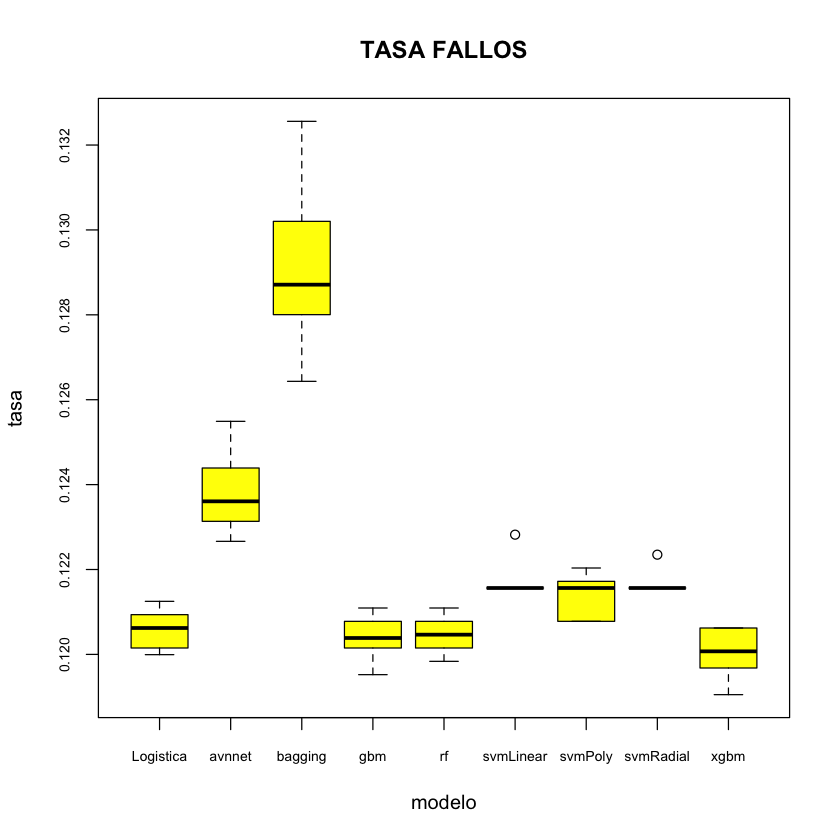

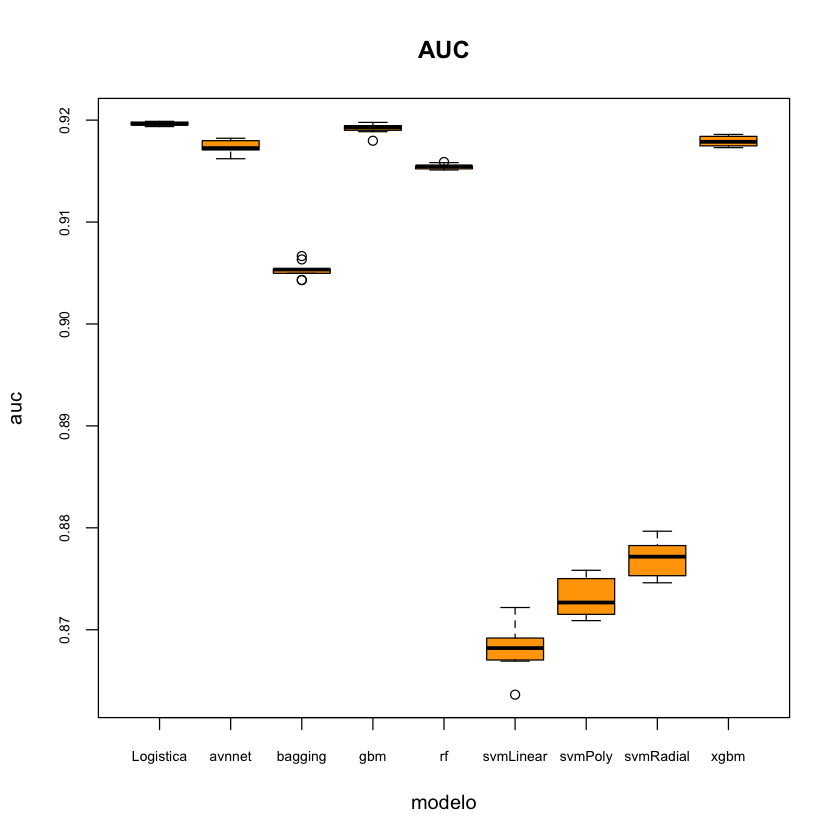

In [21]:
union4<-rbind(medias1bis,medias2bis,
              medias3bis,medias301bis,medias4bis,medias5bis,medias6bis,
              medias7bis,medias8bis)

par(cex.axis=0.7)
boxplot(data=union4,tasa~modelo,col="yellow",main='TASA FALLOS')
boxplot(data=union4,auc~modelo,col="orange",main='AUC')

De los modelos propios de los algoritmos estudiados, en cuanto a AUC destaca la regresión logística.

## Construcción ensamblados

In [22]:
unipredi<-cbind(predi1,predi2,predi3,predi301,predi4,predi5,predi6,predi7,predi8)

In [23]:
#eliminar columnas duplicadas
unipredi<- unipredi[, !duplicated(colnames(unipredi))]

In [24]:
# Construccion de ensamblados
unipredi$predi9<-(unipredi$logi+unipredi$avnnet)/2
unipredi$predi10<-(unipredi$logi+unipredi$rf)/2
unipredi$predi11<-(unipredi$logi+unipredi$gbm)/2
unipredi$predi12<-(unipredi$logi+unipredi$xgbm)/2
unipredi$predi13<-(unipredi$logi+unipredi$svmLinear)/2
unipredi$predi14<-(unipredi$logi+unipredi$svmPoly)/2
unipredi$predi15<-(unipredi$logi+unipredi$svmRadial)/2
unipredi$predi16<-(unipredi$avnnet+unipredi$rf)/2
unipredi$predi17<-(unipredi$avnnet+unipredi$gbm)/2
unipredi$predi18<-(unipredi$avnnet+unipredi$xgbm)/2
unipredi$predi19<-(unipredi$avnnet+unipredi$svmLinear)/2
unipredi$predi20<-(unipredi$avnnet+unipredi$svmPoly)/2
unipredi$predi21<-(unipredi$avnnet+unipredi$svmRadial)/2
unipredi$predi22<-(unipredi$rf+unipredi$gbm)/2
unipredi$predi23<-(unipredi$rf+unipredi$xgbm)/2
unipredi$predi24<-(unipredi$rf+unipredi$svmLinear)/2
unipredi$predi25<-(unipredi$rf+unipredi$svmPoly)/2
unipredi$predi26<-(unipredi$rf+unipredi$svmRadial)/2
unipredi$predi27<-(unipredi$gbm+unipredi$xgbm)/2
unipredi$predi28<-(unipredi$gbm+unipredi$svmLinear)/2
unipredi$predi29<-(unipredi$gbm+unipredi$svmPoly)/2
unipredi$predi30<-(unipredi$gbm+unipredi$svmRadial)/2


unipredi$predi31<-(unipredi$logi+unipredi$avnnet+unipredi$rf)/3
unipredi$predi32<-(unipredi$logi+unipredi$avnnet+unipredi$gbm)/3
unipredi$predi33<-(unipredi$logi+unipredi$avnnet+unipredi$xgbm)/3
unipredi$predi34<-(unipredi$logi+unipredi$avnnet+unipredi$svmLinear)/3
unipredi$predi35<-(unipredi$logi+unipredi$avnnet+unipredi$svmPoly)/3
unipredi$predi36<-(unipredi$logi+unipredi$avnnet+unipredi$svmRadial)/3
unipredi$predi37<-(unipredi$logi+unipredi$rf+unipredi$gbm)/3
unipredi$predi38<-(unipredi$logi+unipredi$rf+unipredi$xgbm)/3
unipredi$predi39<-(unipredi$logi+unipredi$rf+unipredi$svmLinear)/3
unipredi$predi40<-(unipredi$logi+unipredi$rf+unipredi$svmPoly)/3
unipredi$predi41<-(unipredi$logi+unipredi$rf+unipredi$svmRadial)/3
unipredi$predi42<-(unipredi$logi+unipredi$gbm+unipredi$xgbm)/3
unipredi$predi43<-(unipredi$logi+unipredi$gbm+unipredi$xgbm)/3
unipredi$predi44<-(unipredi$logi+unipredi$gbm+unipredi$svmLinear)/3
unipredi$predi45<-(unipredi$logi+unipredi$gbm+unipredi$svmPoly)/3
unipredi$predi46<-(unipredi$logi+unipredi$gbm+unipredi$svmRadial)/3
unipredi$predi47<-(unipredi$logi+unipredi$xgbm+unipredi$svmLinear)/3
unipredi$predi48<-(unipredi$logi+unipredi$xgbm+unipredi$svmPoly)/3
unipredi$predi49<-(unipredi$logi+unipredi$xgbm+unipredi$svmRadial)/3

unipredi$predi50<-(unipredi$rf+unipredi$gbm+unipredi$svmLinear)/3
unipredi$predi51<-(unipredi$rf+unipredi$gbm+unipredi$svmPoly)/3
unipredi$predi52<-(unipredi$rf+unipredi$gbm+unipredi$svmRadial)/3

unipredi$predi53<-(unipredi$rf+unipredi$xgbm+unipredi$svmLinear)/3
unipredi$predi54<-(unipredi$rf+unipredi$xgbm+unipredi$svmPoly)/3
unipredi$predi55<-(unipredi$rf+unipredi$xgbm+unipredi$svmRadial)/3

unipredi$predi56<-(unipredi$rf+unipredi$avnnet+unipredi$gbm)/3
unipredi$predi57<-(unipredi$rf+unipredi$avnnet+unipredi$xgbm)/3
unipredi$predi58<-(unipredi$rf+unipredi$avnnet+unipredi$svmLinear)/3
unipredi$predi59<-(unipredi$rf+unipredi$avnnet+unipredi$svmPoly)/3
unipredi$predi60<-(unipredi$rf+unipredi$avnnet+unipredi$svmRadial)/3

unipredi$predi61<-(unipredi$avnnet+unipredi$gbm+unipredi$svmLinear)/3
unipredi$predi62<-(unipredi$avnnet+unipredi$gbm+unipredi$svmPoly)/3
unipredi$predi63<-(unipredi$avnnet+unipredi$gbm+unipredi$svmRadial)/3

unipredi$predi64<-(unipredi$logi+unipredi$rf+unipredi$gbm+unipredi$avnnet)/4
unipredi$predi65<-(unipredi$logi+unipredi$rf+unipredi$xgbm+unipredi$avnnet)/4
unipredi$predi66<-(unipredi$logi+unipredi$rf+unipredi$xgbm+unipredi$avnnet)/4

unipredi$predi67<-(unipredi$logi+unipredi$rf+unipredi$xgbm+unipredi$avnnet+unipredi$svmLinear)/5
unipredi$predi68<-(unipredi$logi+unipredi$rf+unipredi$xgbm+unipredi$avnnet+unipredi$svmPoly)/5
unipredi$predi69<-(unipredi$logi+unipredi$rf+unipredi$xgbm+unipredi$avnnet+unipredi$svmRadial)/5

# Se han incorporado nuevas combinaciones para incluir al bagging
unipredi$predi70<-(unipredi$bagging+unipredi$gbm)/2
unipredi$predi71<-(unipredi$bagging+unipredi$xgbm)/2
unipredi$predi72<-(unipredi$bagging+unipredi$svmLinear)/2
unipredi$predi73<-(unipredi$bagging+unipredi$svmPoly)/2
unipredi$predi74<-(unipredi$bagging+unipredi$svmRadial)/2
unipredi$predi75<-(unipredi$logi+unipredi$bagging+unipredi$gbm)/3
unipredi$predi76<-(unipredi$logi+unipredi$bagging+unipredi$xgbm)/3
unipredi$predi77<-(unipredi$logi+unipredi$bagging+unipredi$svmLinear)/3
unipredi$predi78<-(unipredi$logi+unipredi$bagging+unipredi$svmPoly)/3
unipredi$predi79<-(unipredi$logi+unipredi$bagging+unipredi$svmRadial)/3




### Listado modelos a considerar

In [25]:
listado<-c("logi", "avnnet", 
           "rf","gbm",  "xgbm", "svmLinear",  "svmPoly", 
           "svmRadial","predi9", "predi10", "predi11", "predi12", 
           "predi13", "predi14", "predi15", "predi16", "predi17", "predi18", 
           "predi19", "predi20", "predi21", "predi22", "predi23", "predi24", 
           "predi25", "predi26", "predi27", "predi28", "predi29", "predi30", 
           "predi31", "predi32", "predi33", "predi34", "predi35", "predi36", 
           "predi37", "predi38", "predi39", "predi40", "predi41", "predi42", 
           "predi43", "predi44", "predi45", "predi46", "predi47", "predi48", 
           "predi49", "predi50", "predi51", "predi52", "predi53", "predi54", 
           "predi55", "predi56", "predi57", "predi58", "predi59", "predi60", 
           "predi61", "predi62", "predi63", "predi64", "predi65", "predi66", 
           "predi67", "predi68", "predi69", "predi71", "predi72", "predi73",
           "predi74", "predi75", "predi76", "predi77", "predi78", "predi79",
           "predi70")

In [26]:
# Defino funcion tasafallos

tasafallos<-function(x,y) {
  confu<-confusionMatrix(x,y)
  tasa<-confu[[3]][1]
  return(tasa)
}

auc<-function(x,y) {
  curvaroc<-roc(response=x,predictor=y)
  auc<-curvaroc$auc
  return(auc)
}


In [27]:
# Se obtiene el numero de repeticiones CV y se calculan las medias por repe en
# el data frame medias0

repeticiones<-nlevels(factor(unipredi$Rep))
unipredi$Rep<-as.factor(unipredi$Rep)
unipredi$Rep<-as.numeric(unipredi$Rep)


In [28]:
medias0<-data.frame(c())
for (prediccion in listado)
{
  unipredi$proba<-unipredi[,prediccion]
  unipredi[,prediccion]<-ifelse(unipredi[,prediccion]>0.5,"Yes","No")
  for (repe in 1:repeticiones)
  {
    paso <- unipredi[(unipredi$Rep==repe),]
    pre<-factor(paso[,prediccion])
    archi<-paso[,c("proba","obs")]
    archi<-archi[order(archi$proba),]
    obs<-paso[,c("obs")]
    tasa=1-tasafallos(pre,obs)
    t<-as.data.frame(tasa)
    t$modelo<-prediccion
    auc<-suppressMessages(auc(archi$obs,archi$proba))
    t$auc<-auc
    medias0<-rbind(medias0,t)
  }
}

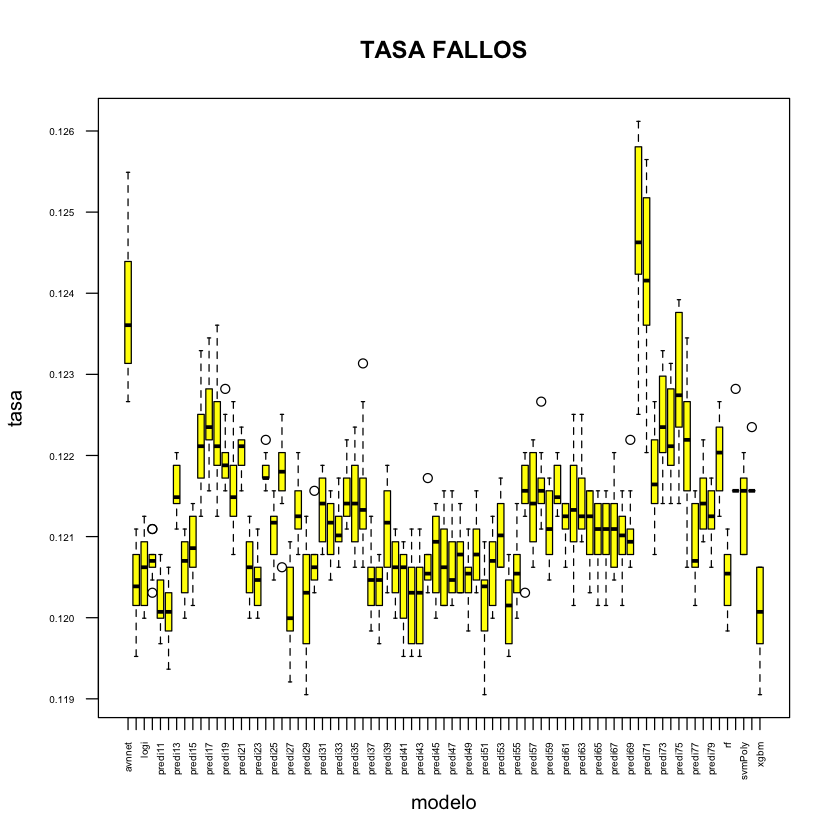

In [29]:
# boxplot

par(cex.axis=0.5,las=2)
boxplot(data=medias0,tasa~modelo,col="yellow",main="TASA FALLOS")

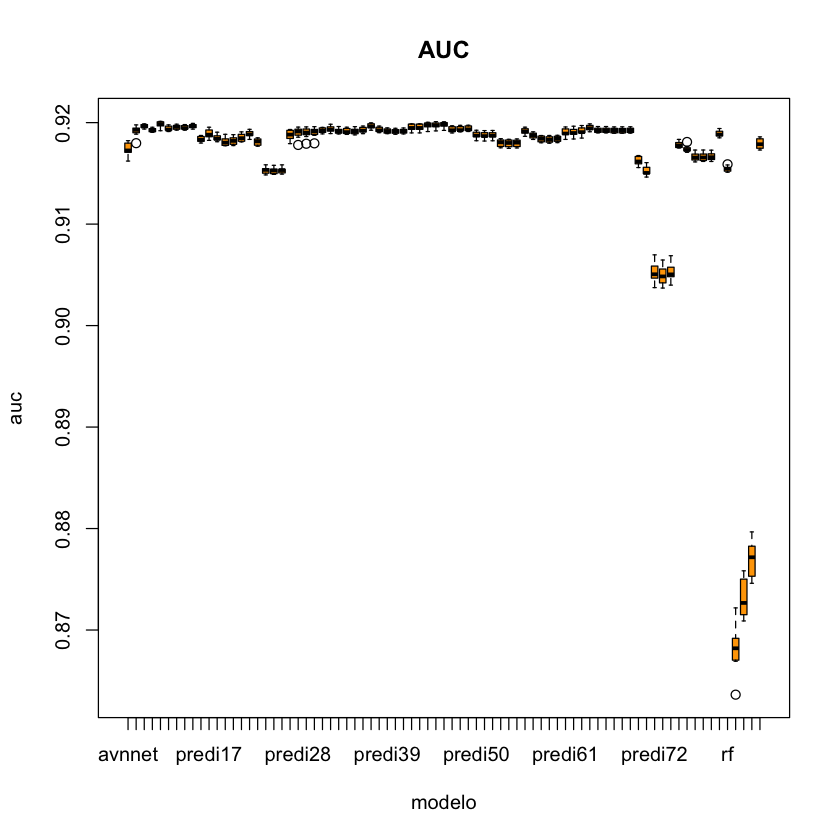

In [30]:
# Para AUC se utiliza la variable auc del archivo medias0

boxplot(data=medias0,auc~modelo,col="orange",main="AUC")

### Tasa de fallos: Presentación tabla de medias

In [ ]:


library(dplyr)
tablamedias<-medias0 %>%
  group_by(modelo) %>%
  summarize(tasa=mean(tasa))     

tablamedias<-as.data.frame(tablamedias[order(tablamedias$tasa),])


In [47]:
tablamedias

modelo,tasa
<chr>,<dbl>
xgbm,0.1200565
predi12,0.1200880
predi27,0.1200880
predi54,0.1201508
predi42,0.1201822
predi43,0.1201822
predi51,0.1201979
predi11,0.1202136
predi29,0.1202293


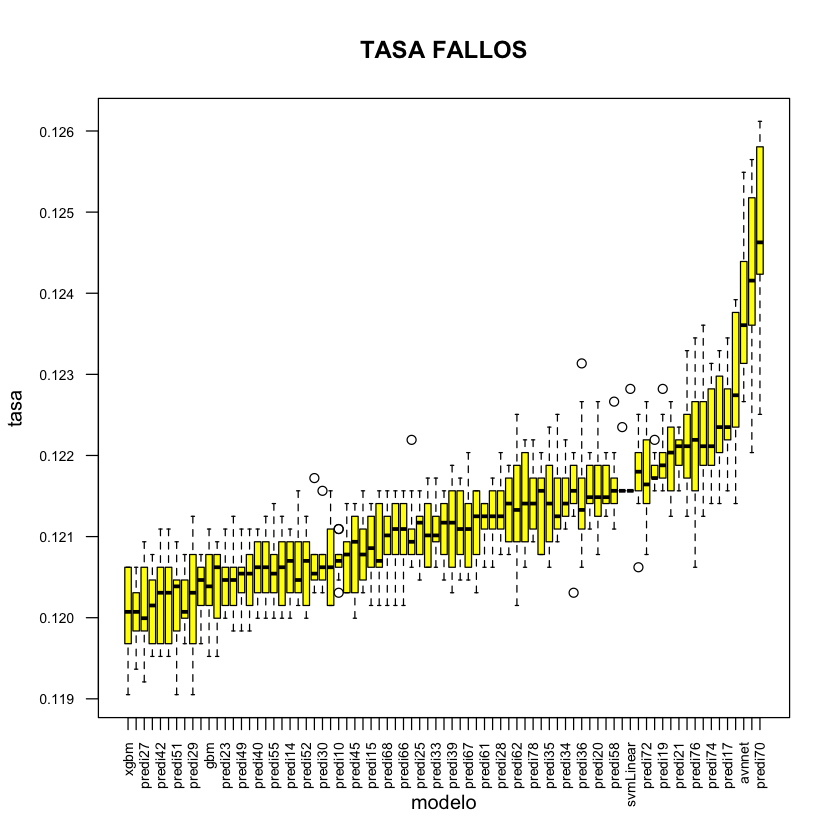

In [32]:
# ORDENACIÓN DEL FACTOR MODELO POR LAS MEDIAS EN TASA
# PARA EL GRAFICO

medias0$modelo <- with(medias0,
                       reorder(modelo,tasa, mean))
par(cex.axis=0.7,las=2)
boxplot(data=medias0,tasa~modelo,col="yellow", main='TASA FALLOS')

### AUC:Presentación tabla de medias

In [33]:

tablamedias2<-medias0 %>%
  group_by(modelo) %>%
  summarize(auc=mean(auc))     

tablamedias2<-tablamedias2[order(-tablamedias2$auc),]



In [48]:
tablamedias2

modelo,auc
<fct>,<dbl>
predi11,0.9198173
predi46,0.9197791
predi45,0.9197358
predi44,0.9197162
predi15,0.9196712
predi37,0.9196628
logi,0.9196491
predi13,0.9195559
predi42,0.9195257


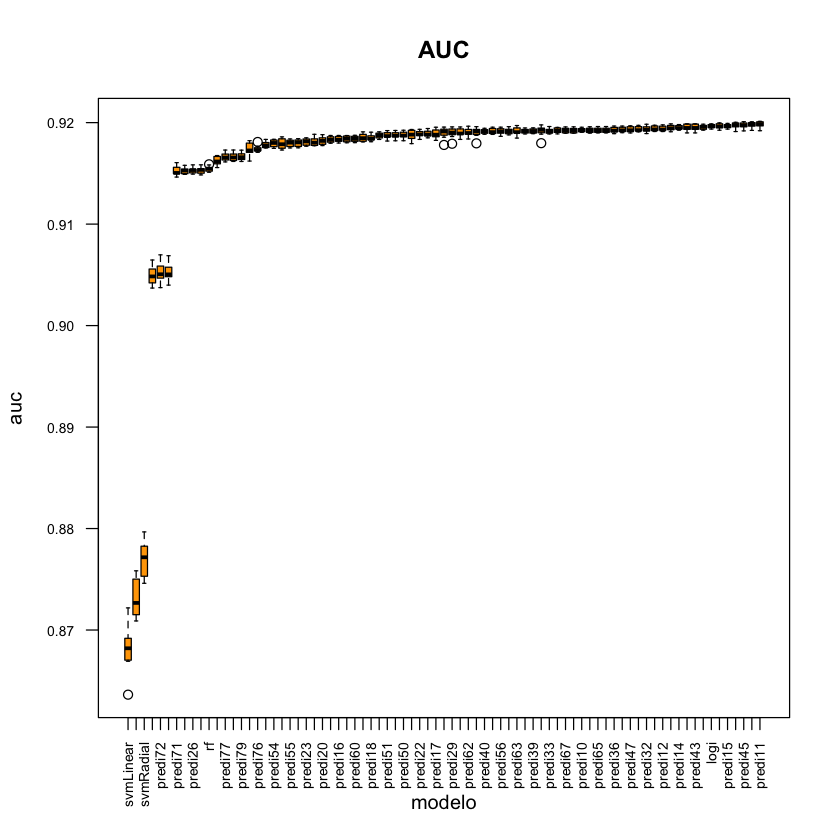

In [34]:
# ORDENACIÓN DEL FACTOR MODELO POR LAS MEDIAS EN AUC
# PARA EL GRAFICO

medias0$modelo <- with(medias0,
                       reorder(modelo,auc, mean))
par(cex.axis=0.7,las=2)
boxplot(data=medias0,auc~modelo,col="orange", main='AUC')



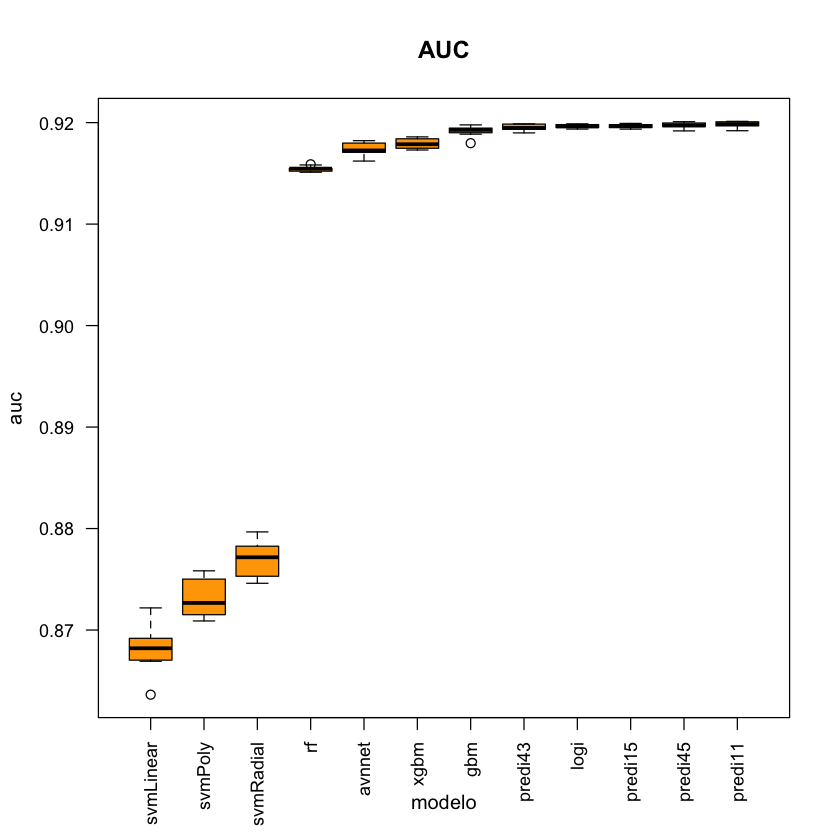

In [35]:
# Se pueden escoger listas pero el factor hay que pasarlo a character
# para que no salgan en el boxplot todos los niveles del factor

listadobis<-c("logi", "avnnet", 
              "rf","gbm",  "xgbm", "svmLinear",  "svmPoly", 
              "svmRadial","bagging","predi43", "predi15", "predi45", "predi11") 

medias0$modelo<-as.character(medias0$modelo)

mediasver<-medias0[medias0$modelo %in% listadobis,]


mediasver$modelo <- with(mediasver,
                         reorder(modelo,auc, median))

par(cex.axis=0.9,las=2)
boxplot(data=mediasver,auc~modelo,col="orange",main='AUC')


# Conclusiones


1) Efectivamente se presentan divergencias sustanciales entre la Tasa de fallos y la AUC, pues se obtiene que en cuanto a Tasa de Fallos el modelo Xgboost es el mejor, siguiéndole (en lo que a modelo s simples se refiere) Gbm y Rf. No obstante, ante estas divergencias, se opta por el AUC como medida de diagnóstico debido a estas incoherencias, destacando pues el modelo de regresión logística como el que mejor se comporta.

2) Los algoritmos simples que mejor funcionan respecto a AUC son la regresión logística, Gbm y Xgboost.

3) El modelo que mayor AUC presenta es el formado tras el procedimiento de ensamblado mediante la combinación (unipredi$logi+unipredi$gbm)/2, es el modelo predi11 y presenta los valores de AUC =0.9198173 y de Tasa de fallos =0.1202136

4) En estos datos , aun teniendo mejor desempeño en cuanto a AUC el modelo pred11, al ser pequeña la diferencia con la regresión logística(0.0001682), se escoge como **mejor modelo para modelizar el dataset en cuestión la regresión lógística**. Esta presenta los valores de AUC =0.9196491 y de Tasa de fallos =0.1206063

### Matriz de confusión


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6920  -0.5789  -0.3445   0.0605   2.6563  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.86781    0.57916  10.132  < 2e-16 ***
hosp_y      -7.86585    0.58132 -13.531  < 2e-16 ***
highbp_nk    1.10888    0.25015   4.433 9.30e-06 ***
age          0.44437    0.04951   8.976  < 2e-16 ***
angina_nk    1.30681    0.22958   5.692 1.25e-08 ***
angina_y     0.50003    0.08687   5.756 8.61e-09 ***
smstat_nk    1.05189    0.19161   5.490 4.03e-08 ***
yronset     -0.22685    0.04198  -5.404 6.52e-08 ***
stroke_y     0.65658    0.11882   5.526 3.28e-08 ***
stroke_nk    0.99123    0.27662   3.583 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8753.1  on 6366  degrees of freedom
Residual deviance: 3789.1  on 6357  degrees of freedom
AIC: 3809.1

Number of Fisher Scoring it

Generalized Linear Model 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5730, 5730, 5731, 5730, 5730, ... 
Resampling results:

  Accuracy   Kappa    
  0.8792173  0.7500583


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3465  709
       Yes   60 2133
                                         
               Accuracy : 0.8792         
                 95% CI : (0.871, 0.8871)
    No Information Rate : 0.5536         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7501         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7505         
            Specificity : 0.9830         
         Pos Pred Value : 0.9726         
         Neg Pred Value : 0.8301         
             Prevalence : 0.4464         
         Detection Rate : 0.3350         
   Detection Prevalence : 0.3444         
      Balanced Accuracy : 0.8668         
                                         
       'Positive' Class : Yes            
                                         

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.9196

Setting levels: control = No, case = Yes

Setting direction: controls < cases



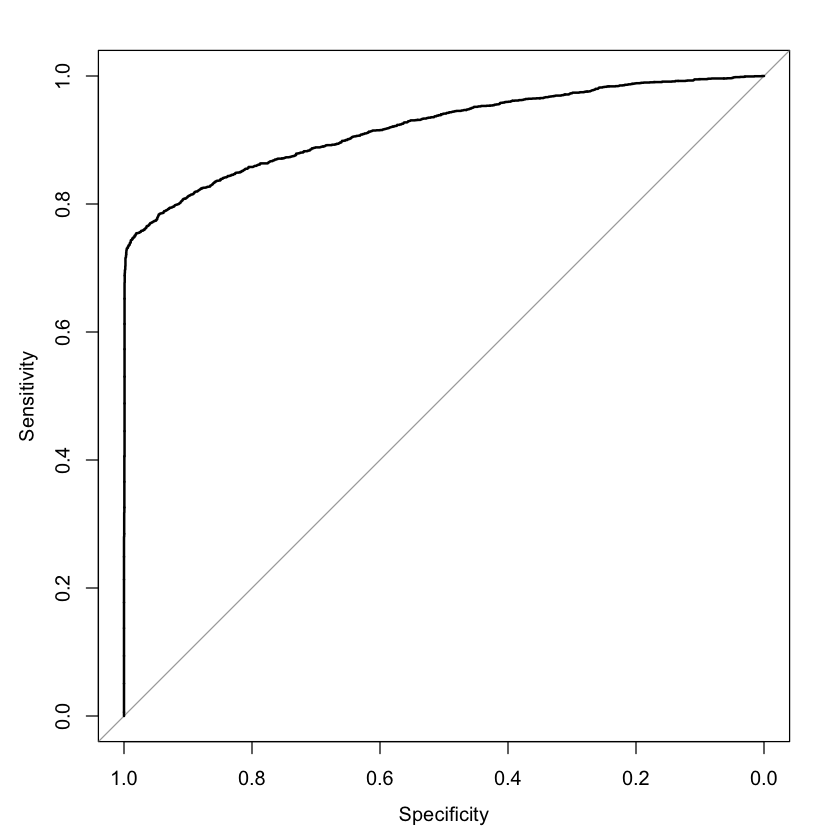

In [50]:

control<-trainControl(method = "cv",
                      number=10,
                      classProbs=TRUE,
                      savePredictions = "all") 

logi<- train(factor(outcome)~
             hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
             data=data,
             method="glm",
             trControl=control)

summary(logi)
logi
sal<-logi$pred

salconfu<-confusionMatrix(sal$pred,sal$obs,positive="Yes")
salconfu

curvaroc<-roc(response=sal$obs,predictor=sal$Yes)
auc<-curvaroc$auc
auc
plot(roc(response=sal$obs,predictor=sal$Yes))

** Exactitud**
El accuracy del modelo es la proporción de veces que el algoritmo predijo correctamente, respecto al total de datos evaluados.
En nuestro caso es :0.87922, se está cerca del valor verdadero, con un 12 % de error.

** Sensitividad**
La sensibilidad  mide la proporción de positivos reales que se identifican correctamente como tales.
En nuestro caso es: 0.7505, es la peor de las tasas que tenemos, al escapársele al modelo la correcta detección de positivos en un 25%.

** Especificidad**
La especificidad  mide la proporción de negativos reales que se identifican correctamente como tales.
En nuestro caso es: 0.9829, por lo que el modelo identifica bastante bien los verdaderos negativos.

** Precisión **
La precisión se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud. 
En nuestro caso es : 0.9726, el conjunto no es muy disperso, de ahí la magnitud de la precisón.